In [1]:
import requests
from bs4 import BeautifulSoup
import csv
from itertools import cycle
import pandas_datareader as web
import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nrand
from datetime import date
import csv

In [51]:
stock = 'CADE'

startMonth = 1
startDay = 1
startYear = 2018

endMonth = 12
endDay = 17
endYear = 2020

start = datetime.datetime(startYear, startMonth, startDay)
end = datetime.datetime(endYear, endMonth, endDay)

In [52]:
df = web.DataReader(stock, 'yahoo', start, end)
path_out = 'C:\\Users\\faiza\\OneDrive\\Desktop\\insiderStocks\\'
df.to_csv(path_out + '$' + stock + '.txt')
classFile = open("C:\\Users\\faiza\\OneDrive\\Desktop\\insiderStocks\\$" + stock + '.txt', "r")

In [53]:
dates = []
closes = []

for line in classFile:
    
    dates.append(line[0 : line.find(',')])
    adjClose = line
    
    for y in range(6):
        adjClose = adjClose[adjClose.find(',') + 1 : ]
    
    closes.append(adjClose.strip())

In [54]:
# # Get Proxies 
def getProxies(inURL):
    
    page = requests.get(inURL)
    soup = BeautifulSoup(page.text, 'html.parser')
    terms = soup.find_all('tr')
    IPs = []

    for x in range(len(terms)):  
        
        term = str(terms[x])        
        
        if '<tr><td>' in str(terms[x]):
            pos1 = term.find('d>') + 2
            pos2 = term.find('</td>')

            pos3 = term.find('</td><td>') + 9
            pos4 = term.find('</td><td>US<')
            
            IP = term[pos1:pos2]
            port = term[pos3:pos4]
            
            if '.' in IP and len(port) < 6:
                IPs.append(IP + ":" + port)
                #print(IP + ":" + port)

    return IPs 


#Cycle through the proxies and get one to use 
proxyURL = "https://www.us-proxy.org/"
pxs = getProxies(proxyURL)
proxyPool = cycle(pxs)


In [55]:
page = requests.get('http://openinsider.com/' + stock, proxies = {"http": next(proxyPool)})
soup = BeautifulSoup(page.text, 'html.parser')
soup2 = str(BeautifulSoup(page.text, 'html.parser'))
elems = soup.find_all(title="SEC Form 4")

In [56]:
soup2 = str(BeautifulSoup(page.text, 'html.parser'))
trades = []

while 'title="SEC Form' in soup2:

    data = soup2[soup2.find('title="SEC Form') - 200 : soup2.find('title="SEC Form') + 1000]
    details = []

    while '>' in data:
        
        data = data[data.find('>') + 1 : ]
        num = data[0 : data.find('</')]

        if len(num) < 50 and len(num) > 1 and num != '' and 'align' not in num and 'div' not in num and '<td' not in num:

            details.append(num)
            #print(num)
            
    trades.append(details)

    soup2 = soup2[soup2.find('title="SEC Form') + 701 : ]


In [57]:
tradeDates = []
ownershipChange = []

for x in trades:

    #print(x)
    if 'Purchase' in x[5]:
        tradeDates.append(x[1])
        ownershipChange.append(x[-2])

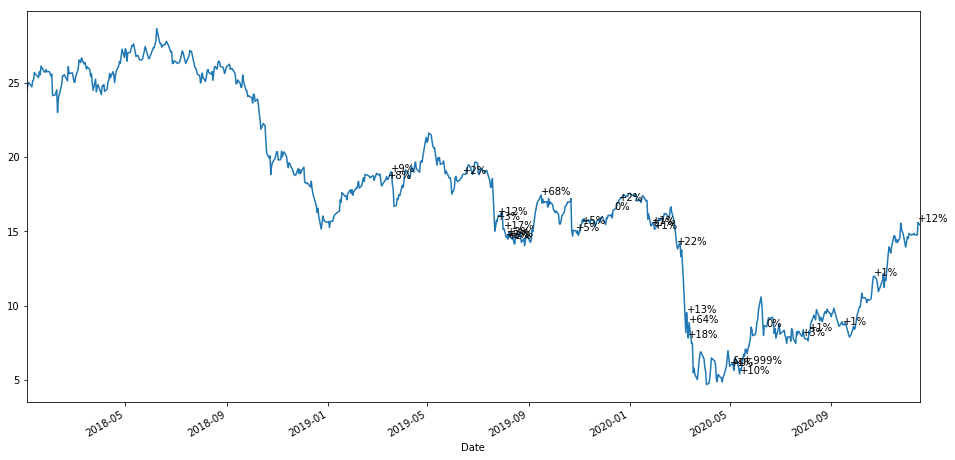

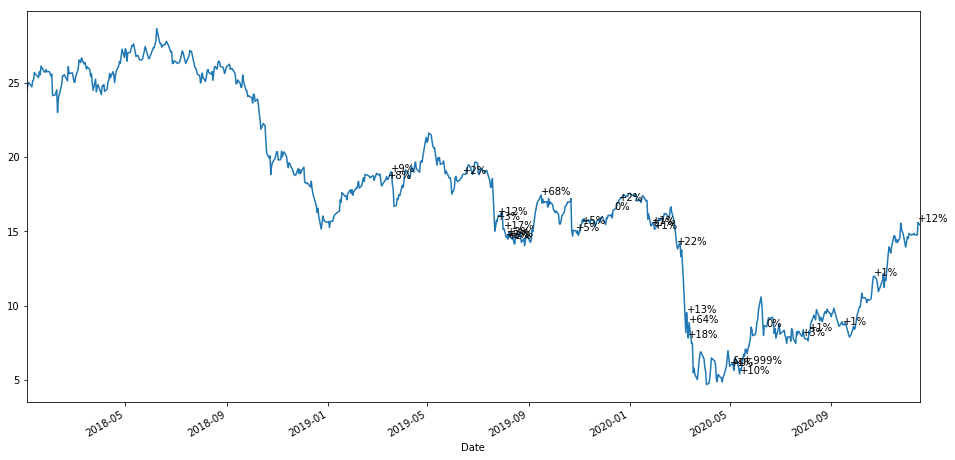

In [58]:
fig, ax = plt.subplots()
df['Adj Close'].plot(figsize=(16,8), ax=ax)


for row in df.iterrows():

    date = str(row[0])
    date = date[0 : date.find(' ')]

    if date in tradeDates:
        ax.text(row[0], row[1][5], ownershipChange[tradeDates.index(date)])


fig.canvas.draw()
fig